### Import moduels and libraries for use

In [1]:
import nltk
import urllib
import pandas as pd
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from textblob import TextBlob
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import os
import re
from sklearn.manifold import TSNE
from collections import defaultdict
from nltk.corpus import stopwords
import gensim
from sklearn.manifold import TSNE
import gensim
import string
from gensim import corpora
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
oliver = urllib.request.urlopen('http://www.gutenberg.org/cache/epub/730/pg730.txt').read()
oliver_lines = oliver.decode('utf8')

In [3]:
def find_chapters(book):
    chapters = {}
    i = 0
    b = 0
    for x in range(1, 54):
        i = book.find("CHAPTER ", + b)
        b = book.find("CHAPTER ", i + 1)
        chapters['Chapter {}'.format(x)] = book[i:b]
    return chapters

In [4]:
stop = stopwords.words('english') + ['mr',
                                     'mrs',
                                     'miss', 
                                     'say',
                                     'have', 
                                     'might',
                                     'thought',
                                     'would', 
                                     'could', 
                                     'make', 
                                     'much',
                                     'dear',
                                     'must',
                                     'know',
                                     'one',
                                     'good',
                                     'every',
                                     'towards',
                                     'give',
                                     'come',
                                     'go',
                                     'well',
                                     'see',
                                     'think',
                                     'though',
                                     'never',
                                     'always',
                                     'although',
                                     'may',
                                     'soon',
                                     'wish',
                                     'take',
                                     'great',
                                     'nothing',
                                     'something',
                                     'young',
                                     'look',
                                     'even',
                                     'cannot',
                                     'many',
                                     'few',
                                     'even',
                                     'however',
                                     'like',
                                     'lucas'
                                     'ever',
                                     'feel',
                                     'shall',
                                     'hope',
                                     'sure',
                                     'yes',
                                     'no',
                                     'oh',
                                     'two',
                                     'three',
                                     'first',
                                     'second',
                                     'third',
                                     'with',
                                     'without',
                                     'use',
                                     'quite',
                                     'dont',
                                     'oliver',
                                     'fagin',
                                     'nancy',
                                     'bill',
                                     'dodger',
                                     'mrbrownlow',
                                     'mrbumble',
                                     'charley',
                                     'dodger',
                                     'mrsowerberry',
                                     'mrssowerberry',
                                     'mrsmaylie',
                                     'noah',
                                     'charlotte',
                                     'sikes',
                                     'maylie',
                                     'bates',
                                     'toby' ,
                                     'gamfield',
                                     'grimwig',
                                     'barney',
                                     'chitling',
                                     'harry',
                                     'giles',
                                     'monk',
                                     'jew']

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'
    
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    try:
        tag = get_wordnet_pos(nltk.pos_tag([word])[0][1])
        return lemmatizer.lemmatize(word, pos=tag)
    except:
        pass

### Split corpus into sentences, clean and lemmatize

In [5]:
def all_sentences(corpus,
                  include_stop=True):
    vocab = []
    
    text = corpus.replace('Oliver Twist', 'Oliver')\
                 .replace('Bill Sikes', 'Bill')\
                 .replace('Mr. Brownlow', 'MrBrownlow')\
                 .replace('Mr. Bumble', 'MrBumble')\
                 .replace('Charley Bates', 'Charley')\
                 .replace('Artful Dodger', 'Dodger')\
                 .replace('Mr. Sowerberry', 'MrSowerberry')\
                 .replace('Mrs. Sowerberry', 'MrsSowerberry')\
                 .replace('Mrs. Maylie', 'MrsMaylie')\
                 .replace('Jew', 'Fagin')\
                 .replace('Noah Claypole', 'Noah')
    
    for line in sent_tokenize(text):
        line= re.sub('[%s]|Chapter' % re.escape(string.punctuation), '', line)
        line = re.sub('[^a-zA-Z\ ]', '', line)
        line = line.lower()
        line = line.split()
        if include_stop:
            line = [lemmatize_word(x) for x in line if lemmatize_word(x) not in stop]
        else:
            line = [lemmatize_word(x) for x in line]
        vocab.append(line)
    return vocab

### Function to get word frequencies

In [6]:
def get_frequecies(corpus):
    dictionary = corpora.Dictionary(corpus)
    # You can check the mapping by caling 'token2id' attribute.
    id_map = dictionary.token2id
    count_map = dictionary.dfs
    word_count = {}
    for word, id_ in id_map.items():
        word_count[word] = count_map[id_]
    sorted_corpus = sorted([(x,y) 
                           for x,y in word_count.items()], 
                           key=lambda x: x[1], reverse=True)
    return sorted_corpus

### Top Keywords in Full Corpus

In [7]:
full_corpus = all_sentences(oliver_lines[6255:-19184])
frequencies = get_frequecies(full_corpus)
frequencies

[('reply', 500),
 ('upon', 388),
 ('old', 378),
 ('man', 339),
 ('boy', 322),
 ('time', 310),
 ('gentleman', 291),
 ('hand', 283),
 ('cry', 229),
 ('lady', 228),
 ('little', 227),
 ('eye', 226),
 ('get', 220),
 ('head', 215),
 ('turn', 212),
 ('girl', 212),
 ('back', 208),
 ('rise', 195),
 ('sir', 193),
 ('way', 190),
 ('door', 186),
 ('word', 172),
 ('face', 165),
 ('away', 165),
 ('room', 157),
 ('woman', 152),
 ('day', 144),
 ('night', 136),
 ('ask', 132),
 ('round', 129),
 ('place', 127),
 ('long', 126),
 ('tell', 126),
 ('child', 122),
 ('let', 122),
 ('house', 119),
 ('walk', 118),
 ('inquire', 118),
 ('seem', 118),
 ('voice', 114),
 ('put', 113),
 ('stop', 112),
 ('mind', 111),
 ('friend', 111),
 ('return', 110),
 ('doctor', 109),
 ('left', 107),
 ('mean', 106),
 ('another', 105),
 ('ill', 101),
 ('open', 100),
 ('master', 99),
 ('rejoin', 99),
 ('light', 99),
 ('life', 98),
 ('want', 95),
 ('thats', 95),
 ('hear', 95),
 ('street', 94),
 ('heart', 93),
 ('men', 90),
 ('enough', 

### Total Unique Words

In [8]:
len(frequencies)

16217

In [9]:
full_corpus2 = all_sentences(oliver_lines[6255:-19184], include_stop=False)
frequencies2 = get_frequecies(full_corpus2)
samples2 = list(dict(frequencies2).keys())
freqs2 = list(dict(frequencies2).values())

df_words = pd.DataFrame()
df_words['frequency'] = freqs2
df_words['word'] = samples2

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(y = np.log(df_words['frequency']), x = np.log(df_words.index + 1)))

fig.update_layout(go.Layout(
    title='Word Rank vs Word Frequency in Oliver Twist<br>by Charles Dickens<br><sub>Including Stop Words</sub>',
    width=500,
    height=500,
    xaxis=dict(
        title='Log Rank' 
    ),
    yaxis=dict(
        title='Log Frequency', tickfont=dict(size=7)
    )
))
fig.show()

### Top Keywords in Each Chapter

In [11]:
text = find_chapters(oliver_lines[6255:-19184])
for chapter in ['Chapter {}'.format(x) for x in range(1, 54)]:
    corpus = all_sentences(text[chapter])
    print('{}'.format(chapter), get_frequecies(corpus)[:5])

Chapter 1 [('child', 7), ('surgeon', 7), ('nurse', 5), ('hand', 5), ('head', 4)]
Chapter 2 [('mann', 24), ('gentleman', 17), ('beadle', 16), ('boy', 16), ('sir', 11)]
Chapter 3 [('gentleman', 28), ('old', 15), ('boy', 14), ('white', 12), ('waistcoat', 11)]
Chapter 4 [('undertaker', 23), ('boy', 12), ('reply', 11), ('beadle', 10), ('little', 7)]
Chapter 5 [('old', 15), ('sir', 14), ('undertaker', 12), ('reply', 12), ('woman', 12)]
Chapter 6 [('workus', 8), ('reply', 6), ('head', 5), ('bad', 4), ('eye', 4)]
Chapter 7 [('reply', 14), ('sir', 11), ('boy', 10), ('upon', 6), ('time', 6)]
Chapter 8 [('gentleman', 14), ('boy', 13), ('old', 9), ('little', 9), ('london', 8)]
Chapter 9 [('old', 16), ('time', 11), ('reply', 11), ('sir', 11), ('boy', 10)]
Chapter 10 [('gentleman', 16), ('stop', 15), ('old', 14), ('thief', 11), ('boy', 10)]
Chapter 11 [('fang', 33), ('old', 20), ('man', 16), ('gentleman', 16), ('reply', 14)]
Chapter 12 [('old', 32), ('lady', 25), ('gentleman', 13), ('sir', 13), ('li

### Get edgelist from text characters and chapters

In [12]:
edge_list = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 54)]:
    text[chapter] = text[chapter].replace('Oliver Twist', 'Oliver')\
                                 .replace('Bill Sikes', 'Bill')\
                                 .replace('Mr. Brownlow', 'MrBrownlow')\
                                 .replace( 'Mr. Bumble', 'MrBumble')\
                                 .replace('Charley Bates', 'Charley')\
                                 .replace('Artful Dodger', 'Dodger')\
                                 .replace('Mr. Sowerberry', 'MrSowerberry')\
                                 .replace('Mrs. Sowerberry', 'MrsSowerberry')\
                                 .replace('Mrs. Maylie', 'MrsMaylie')\
                                 .replace('Jew', 'Fagin')\
                                 .replace('Noah Claypole', 'Noah')

    for name in ['Oliver',
                 'Fagin',
                 'Nancy',
                 'Bill',
                 'Dodger',
                 'MrBrownlow',
                 'MrBumble',
                 'Charley',
                 'Dodger',
                 'MrSowerberry',
                 'MrsSowerberry',
                 'MrsMaylie',
                 'Noah',
                 'Charlotte',
                 'Monks']:
        print(chapter, name, len(re.findall(name, text[chapter])))
        edge_list.append((chapter, name, len(re.findall(name, text[chapter]))))

data_df = pd.DataFrame(edge_list)
data_df.columns = ['Chapter', 'Character', 'Weight']
data_df = data_df[data_df['Weight']>0]

Chapter 1 Oliver 8
Chapter 1 Fagin 0
Chapter 1 Nancy 0
Chapter 1 Bill 0
Chapter 1 Dodger 0
Chapter 1 MrBrownlow 0
Chapter 1 MrBumble 0
Chapter 1 Charley 0
Chapter 1 Dodger 0
Chapter 1 MrSowerberry 0
Chapter 1 MrsSowerberry 0
Chapter 1 MrsMaylie 0
Chapter 1 Noah 0
Chapter 1 Charlotte 0
Chapter 1 Monks 0
Chapter 2 Oliver 39
Chapter 2 Fagin 0
Chapter 2 Nancy 0
Chapter 2 Bill 0
Chapter 2 Dodger 0
Chapter 2 MrBrownlow 0
Chapter 2 MrBumble 22
Chapter 2 Charley 0
Chapter 2 Dodger 0
Chapter 2 MrSowerberry 0
Chapter 2 MrsSowerberry 0
Chapter 2 MrsMaylie 0
Chapter 2 Noah 0
Chapter 2 Charlotte 0
Chapter 2 Monks 0
Chapter 3 Oliver 33
Chapter 3 Fagin 0
Chapter 3 Nancy 0
Chapter 3 Bill 0
Chapter 3 Dodger 0
Chapter 3 MrBrownlow 0
Chapter 3 MrBumble 20
Chapter 3 Charley 0
Chapter 3 Dodger 0
Chapter 3 MrSowerberry 0
Chapter 3 MrsSowerberry 0
Chapter 3 MrsMaylie 0
Chapter 3 Noah 0
Chapter 3 Charlotte 0
Chapter 3 Monks 0
Chapter 4 Oliver 27
Chapter 4 Fagin 0
Chapter 4 Nancy 0
Chapter 4 Bill 0
Chapter 4 D

Chapter 46 Nancy 5
Chapter 46 Bill 0
Chapter 46 Dodger 0
Chapter 46 MrBrownlow 1
Chapter 46 MrBumble 0
Chapter 46 Charley 0
Chapter 46 Dodger 0
Chapter 46 MrSowerberry 0
Chapter 46 MrsSowerberry 0
Chapter 46 MrsMaylie 0
Chapter 46 Noah 1
Chapter 46 Charlotte 0
Chapter 46 Monks 4
Chapter 47 Oliver 0
Chapter 47 Fagin 26
Chapter 47 Nancy 1
Chapter 47 Bill 17
Chapter 47 Dodger 1
Chapter 47 MrBrownlow 0
Chapter 47 MrBumble 0
Chapter 47 Charley 1
Chapter 47 Dodger 1
Chapter 47 MrSowerberry 0
Chapter 47 MrsSowerberry 0
Chapter 47 MrsMaylie 0
Chapter 47 Noah 9
Chapter 47 Charlotte 0
Chapter 47 Monks 1
Chapter 48 Oliver 0
Chapter 48 Fagin 1
Chapter 48 Nancy 0
Chapter 48 Bill 0
Chapter 48 Dodger 0
Chapter 48 MrBrownlow 0
Chapter 48 MrBumble 0
Chapter 48 Charley 0
Chapter 48 Dodger 0
Chapter 48 MrSowerberry 0
Chapter 48 MrsSowerberry 0
Chapter 48 MrsMaylie 0
Chapter 48 Noah 0
Chapter 48 Charlotte 0
Chapter 48 Monks 0
Chapter 49 Oliver 0
Chapter 49 Fagin 2
Chapter 49 Nancy 0
Chapter 49 Bill 0
Chap

### Build graph

In [13]:
B = nx.Graph()

B.add_nodes_from(data_df['Chapter'],
                 bipartite=0)
B.add_nodes_from(data_df['Character'],
                 bipartite=1)

B.add_weighted_edges_from(
    [(row['Chapter'], 
      row['Character'],
      row['Weight']) for idx, row in data_df.iterrows()])

### Get character projection

In [14]:
character_filter = {n for n, d in B.nodes(data=True) if d['bipartite']==1}

# project bipartite graph onto character nodes keeping number of co-occurences, weighted degree
B_character = nx.bipartite.weighted_projected_graph(B, character_filter)

### Network graph

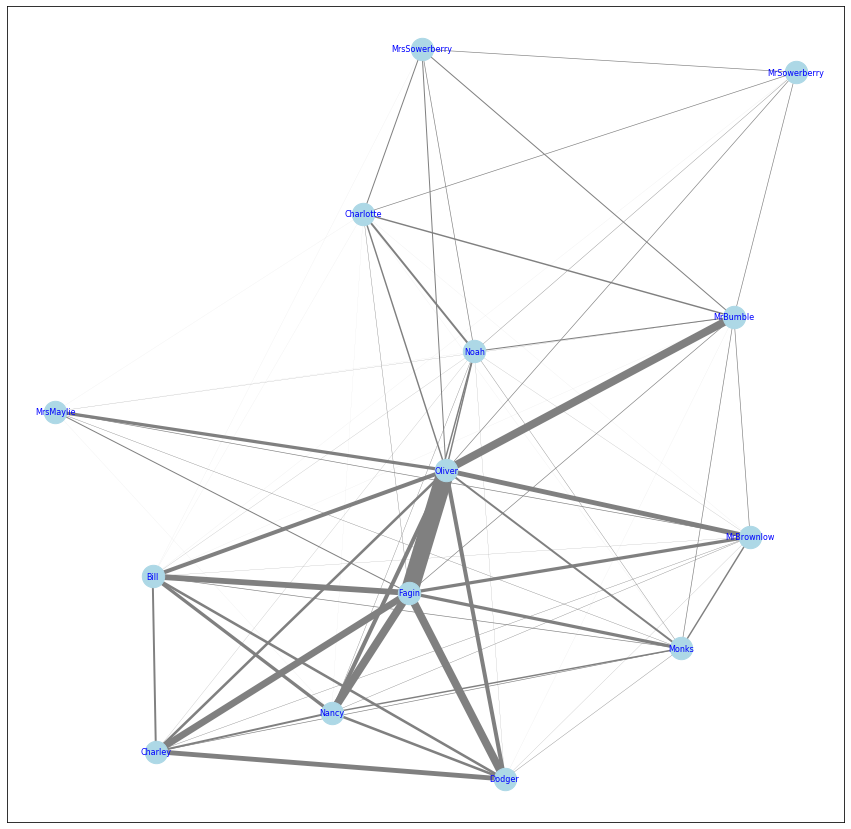

In [15]:
plt.figure(figsize=(15,15));
pos = nx.spring_layout(B_character, iterations = 50);
edges = B_character.edges()
weights = [(B_character[u][v]['weight']/5)**2 for u,v in edges]
nx.draw_networkx_nodes(B_character, pos, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character, pos,  edge_color='gray', width=weights);
nx.draw_networkx_labels(B_character, pos, font_size=8, font_color ='blue');

### Character degree centrality

In [28]:
char_deg_cent = {k:v for k,v in dict(nx.degree_centrality(B)).items()}
print('Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))

Character Degree Centrality 
-----------------------------------------------
Oliver - Degree Centrality: 0.621
Fagin - Degree Centrality: 0.47
MrBumble - Degree Centrality: 0.227
Nancy - Degree Centrality: 0.227
Bill - Degree Centrality: 0.212


### Character betweenness centrality

In [26]:
b_bet_cent = {k:v for k,v in dict(nx.betweenness_centrality(B_character)).items()}
print('Character Betweenness Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in b_bet_cent.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Betweenness Centrality:',round(cdegree,3))

Character Betweenness Centrality 
-----------------------------------------------
Noah - Betweenness Centrality: 0.055
Oliver - Betweenness Centrality: 0.055
Bill - Betweenness Centrality: 0.043
MrBumble - Betweenness Centrality: 0.033
Charlotte - Betweenness Centrality: 0.031


### Create function for NMF and LDA

In [18]:
def NMF_LDA(text):
    maxdf = .5
    mindf = 5
    no_top_words = 10
    no_topics = 5

    tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1, 1),
                                        max_df=maxdf, 
                                        min_df=mindf, 
                                        stop_words=stop)
    tfidf1 = tfidf_vectorizer1.fit_transform(text)
    tfidf_feature_names1 = tfidf_vectorizer1.get_feature_names()

    ct_vectorizer1 = CountVectorizer(ngram_range=(1, 1),
        max_df=maxdf, min_df=mindf, stop_words=stop)
    ct1 = ct_vectorizer1.fit_transform(text)
    tf_feature_names1 = ct_vectorizer1.get_feature_names()

    # Run NMF
    nmf1 = NMF(n_components=no_topics,
               max_iter=300)
    nmf1.fit_transform(tfidf1)

    # Run LDA
    lda1 = LatentDirichletAllocation(n_components=no_topics, 
                                     max_iter=10,
                                     learning_method='online', 
                                     learning_offset=50.,
                                     random_state=0).fit(ct1)
    def display_topics(model, feature_names, no_top_words, model_used):
        topic_dict={}
        for topic_idx, topic in enumerate(model.components_):
            topic_dict["Topic:{}".format(topic_idx+1)]=" ".join(set([feature_names[i].title()
            for i in topic.argsort()[:-no_top_words - 1:-1]]))
        return pd.DataFrame.from_dict(topic_dict,
                                      orient='index')\
                                      .reset_index()\
                                      .rename(columns={'index':'Topic',
                                                       0:'Top Words'})
    
    return display_topics(nmf1, 
                          tfidf_feature_names1, 
                          no_top_words, 
                          "NMF"),\
           display_topics(lda1, 
                          tf_feature_names1, 
                          no_top_words, "LDA")

### Turn lists back into sentences

In [19]:
topic_corpus =  [' '.join(x) for x in full_corpus]

### Get NMF and LDA topics

In [20]:
NMF_LDA_Tuple = NMF_LDA(topic_corpus)

In [21]:
NMF_LDA_Tuple[0]['Top Words'].tolist()

['Maam Course Reply Beadle Woman Girl Man Sir Indeed Rise',
 'Em Eh Get Ah Thats Time Ha Let Rejoin Mean',
 'Gentleman Upon Lady Ask Girl Man Hand Rise Old Cry',
 'Poor Whats Thats Name Get Boy Sir Little Mean Return',
 'Gentleman Inquire Poor Blather Beadle Bumble Man Matron Fang Losberne']

In [22]:
NMF_LDA_Tuple[1]['Top Words'].tolist()

['Maam Air Reply Get Speak Sir Let Ha Hour Begin',
 'Upon Away Ask Face Back Boy Round Hand Turn Old',
 'Put Ill Way Tell Girl Street Light Rejoin Rise Cry',
 'Upon Ever Hear Mind Thats Time Man Heart Doctor Long',
 'Gentleman Lady Word Inquire Get Woman Enough Eye Head Old']

### Plot W2V with TNSE

In [23]:
def W2V(nlp_list):
    
    model = gensim.models.Word2Vec(nlp_list,
                                   size=100,
                                   window=10,
                                   min_count=3,
                                   workers=2)


    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(perplexity=30, 
                      n_components=2, 
                      init='pca', 
                      n_iter=250, 
                      angle=.8)
    
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    df = pd.DataFrame([x, y, labels]).T
    df.columns = ['x','y','label']
        
    return df

In [24]:
full_corpus = all_sentences(oliver_lines[6255:-19184], include_stop=False)
w2v_df = W2V(full_corpus)

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [29]:
character_list = ['oliver',
                  'fagin',
                  'nancy',
                  'bill',
                  'dodger',
                  'mrbrownlow',
                  'mrbumble',
                  'charley',
                  'dodger',
                  'mrsowerberry',
                  'mrssowerberry',
                  'mrsmaylie',
                  'noah',
                  'charlotte',
                  'monks']

character_list = [x.lower() for x in character_list]

df = w2v_df[w2v_df['label'].isin(character_list)]


text_pos = [x for x in np.random.choice(['top left', 
                                         'bottom left',
                                         'top right',
                                         'bottom right'], 
                                          len(df),
                                          p=[.2,.3,.3,.2])]


trace = go.Scatter(x=df['x'],
                   y=df['y'],
                   mode='markers+text', 
                   textposition=text_pos,
                   text=df['label'],
                   textfont=dict(size=8),
                   hoverinfo='text')



fig = go.Figure([trace])

fig.update_layout(go.Layout(
    title='Word2Vec Name Vector Similarity',
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=800
)
